In [407]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [319]:
# Load data
df_USA = pd.read_csv("database_USA.csv")
df_IND = pd.read_csv("database_IND.csv")
df_AUS = pd.read_csv("database_AUS.csv")

In [320]:
# Concatenate datasets
df = pd.concat([df_USA, df_AUS, df_IND], ignore_index=True)

In [321]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
13293,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
13294,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13295,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13297,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
df.shape

(13298, 27)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [325]:
# Removing some columns those have maximum no of null value
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','country_long','name'],axis=1,inplace=True)


In [326]:
df.isnull().sum()


country                      0
gppd_idnr                    0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
owner                      593
source                       0
url                          0
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [327]:
# Removing unwanted columns

df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)


In [328]:
df.isnull().sum()


country                     0
capacity_mw                 6
latitude                   78
longitude                  78
primary_fuel             2004
commissioning_year       2644
source                      0
url                         0
geolocation_source         23
year_of_capacity_data     438
generation_gwh_2013      6128
generation_gwh_2014      5764
generation_gwh_2015      5305
generation_gwh_2016      4597
generation_gwh_2017      4006
generation_gwh_2018      3440
generation_gwh_2019      3520
dtype: int64

In [329]:
#Also removing column 'year_of_capacity_data' because it having one unique value
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [330]:
# filling columns with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
df['primary_fuel'].fillna(df['primary_fuel'].mode()[0], inplace=True)
df['source'].fillna(df['source'].mode()[0], inplace=True)

In [331]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [332]:
df.isnull().sum()


country                0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13298 non-null  object 
 1   capacity_mw          13298 non-null  float64
 2   latitude             13298 non-null  float64
 3   longitude            13298 non-null  float64
 4   primary_fuel         13298 non-null  object 
 5   commissioning_year   13298 non-null  float64
 6   source               13298 non-null  object 
 7   url                  13298 non-null  object 
 8   geolocation_source   13298 non-null  object 
 9   generation_gwh_2013  13298 non-null  float64
 10  generation_gwh_2014  13298 non-null  float64
 11  generation_gwh_2015  13298 non-null  float64
 12  generation_gwh_2016  13298 non-null  float64
 13  generation_gwh_2017  13298 non-null  float64
 14  generation_gwh_2018  13298 non-null  float64
 15  generation_gwh_2019  13298 non-null 

In [334]:
df

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,USA,0.0,41.6327,-71.4963,Solar,5.5,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.500,5.5,5.500000,5.50000,5.5,5.5,5.5
1,USA,2.0,41.0930,-73.9828,Solar,2016.0,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.500,5.5,5.500000,5.50000,5.5,5.5,2.467
2,USA,0.0,36.2838,-80.8434,Solar,5.5,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.500,5.5,5.500000,5.50000,5.5,5.5,5.5
3,USA,0.0,36.2167,-80.5525,Solar,5.5,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.500,5.5,5.500000,5.50000,5.5,5.5,5.5
4,USA,0.0,36.1475,-80.6561,Solar,5.5,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,5.500,5.5,5.500000,5.50000,5.5,5.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,IND,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,5.500,5.5,0.994875,233.59665,865.4,686.5,5.5
13294,IND,3.0,12.8932,78.1654,Solar,5.5,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,1.925,5.5,5.500000,5.50000,5.5,5.5,5.5
13295,IND,25.5,15.2758,75.5811,Wind,5.5,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2.054,5.5,5.500000,5.50000,5.5,5.5,5.5
13296,IND,80.0,24.3500,73.7477,Coal,5.5,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,5.500,5.5,5.500000,5.50000,5.5,5.5,5.5


In [335]:
df.drop('url',axis=1,inplace=True)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

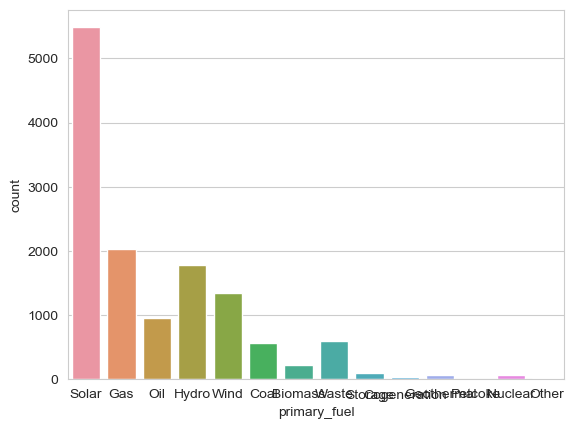

In [336]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [337]:
df['primary_fuel'].nunique()


14

In [338]:
df['primary_fuel'].unique()

array(['Solar', 'Gas', 'Oil', 'Hydro', 'Wind', 'Coal', 'Biomass', 'Waste',
       'Storage', 'Cogeneration', 'Geothermal', 'Petcoke', 'Nuclear',
       'Other'], dtype=object)

In [339]:
#Exploratory Data Analysis

<AxesSubplot:>

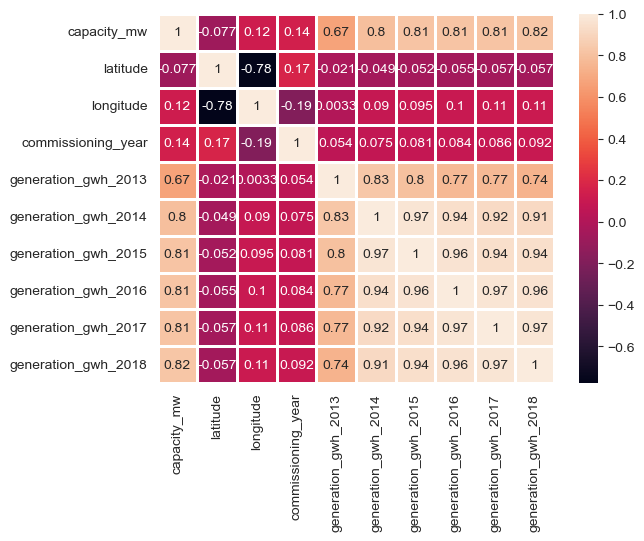

In [340]:
dfcorr=df.corr()
sns.heatmap(dfcorr,annot=True, linewidth=1)


Here we can notice generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

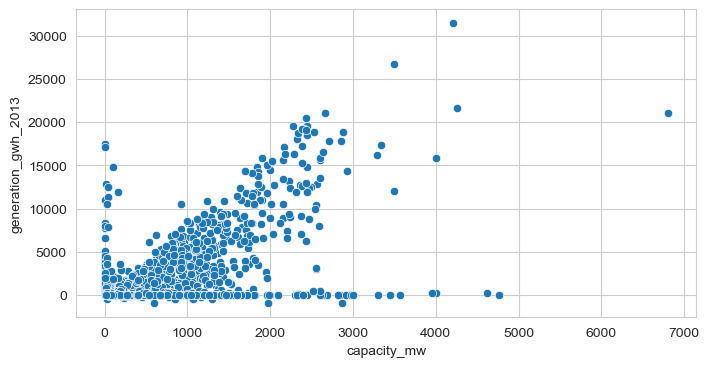

In [341]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

 We can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2013

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

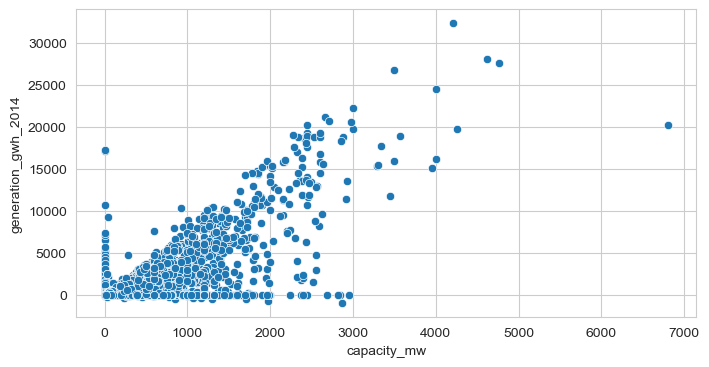

In [342]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

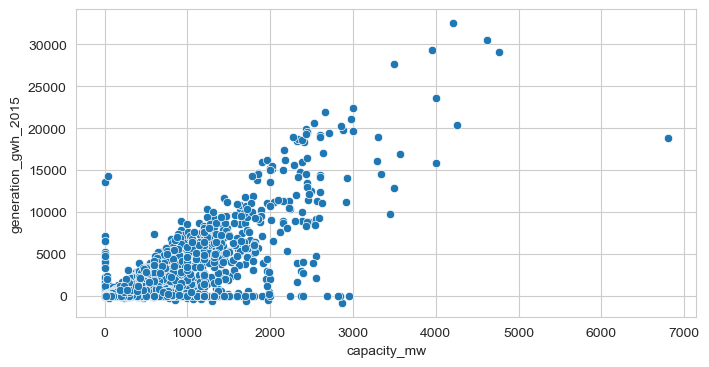

In [343]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

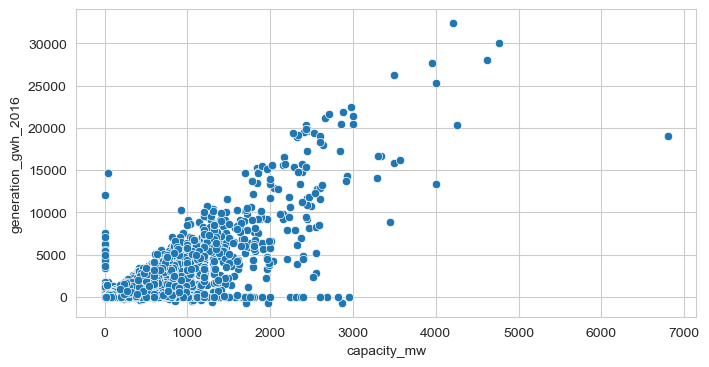

In [344]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

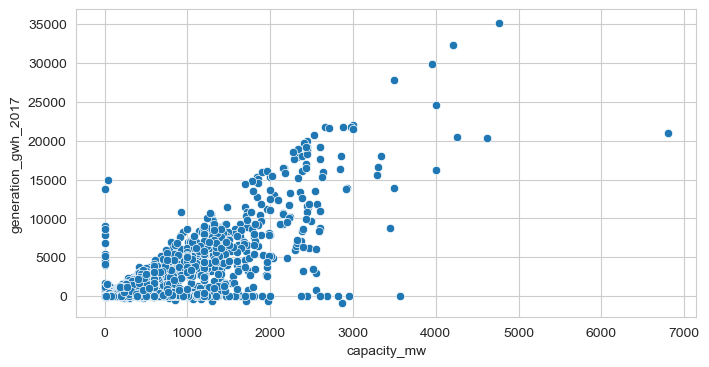

In [345]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

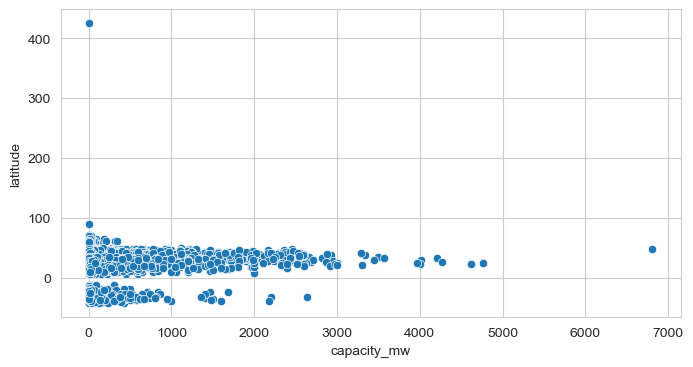

In [346]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

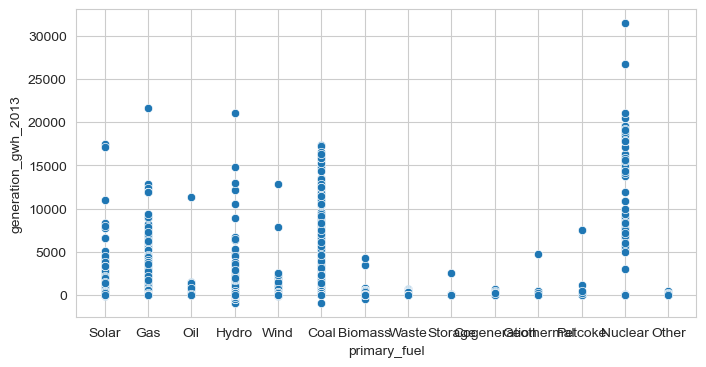

In [347]:

plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

 We can here the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

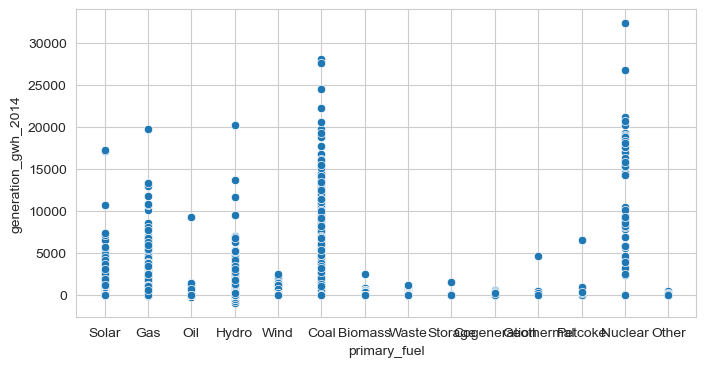

In [348]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

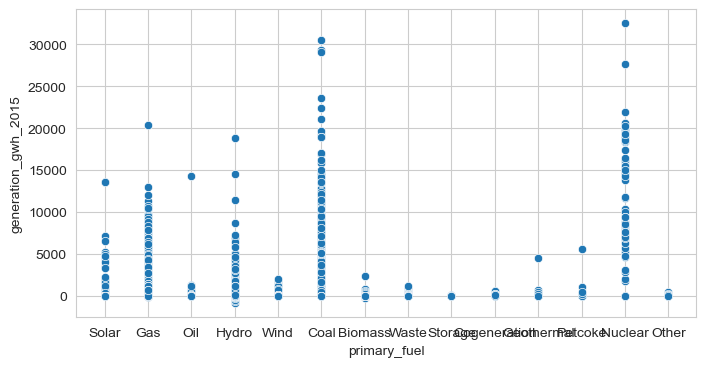

In [349]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

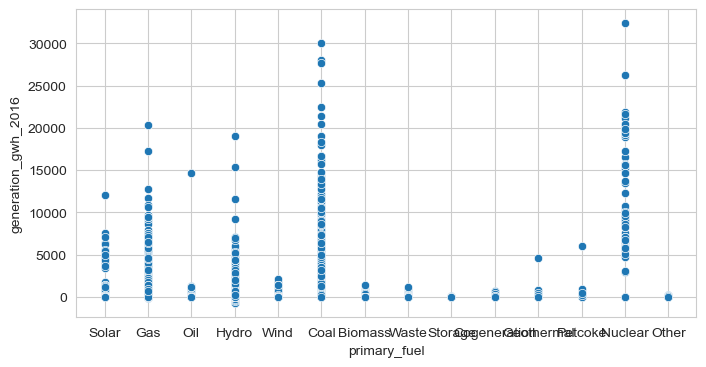

In [350]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

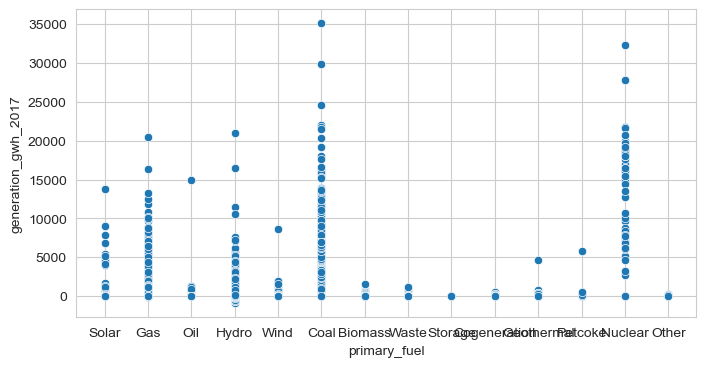

In [351]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

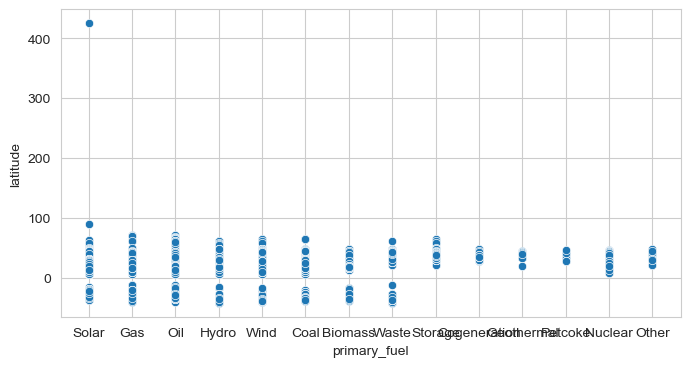

In [352]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

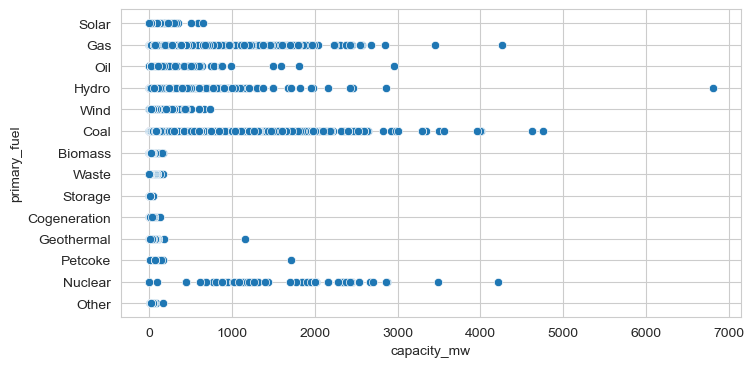

In [353]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Coal is on Max Electrical generating capacity in Megawatts



In [354]:
#Using LabelEncoder for convering Categorical to Numerical

df['primary_fuel'] = df['primary_fuel'].astype(str)
label_encoder = LabelEncoder()
df['primary_fuel_encoded'] = label_encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = label_encoder.fit_transform(df['geolocation_source'])
df['source'] = label_encoder.fit_transform(df['source'])
df['country'] = label_encoder.fit_transform(df['country'])

In [355]:
df['country'] = label_encoder.fit_transform(df['country'])

In [356]:
df['primary_fuel'] = df['primary_fuel'].astype(str)
label_encoder = LabelEncoder()
df['primary_fuel'] = label_encoder.fit_transform(df['primary_fuel'])

In [357]:
df['generation_gwh_2019'] = df['generation_gwh_2019'].astype(str)
label_encoder = LabelEncoder()
df['generation_gwh_2019'] = label_encoder.fit_transform(df['generation_gwh_2019'])

In [358]:
df['source'] = df['source'].astype(str)
label_encoder = LabelEncoder()
df['source'] = label_encoder.fit_transform(df['source'])

In [359]:
df['source'].unique()

array([ 96, 145,  36, 122,  33, 158,  17,  34, 127,  78, 148,  88,  38,
       117,  24,  20,  99, 121, 123, 167, 139,   2,  67,  23,   6, 196,
       177,  57, 186, 175, 174,  97, 110, 171, 182,  16,  85, 105,  61,
        90, 101, 178, 162, 112,  63,  42, 170,  11, 197, 194, 128, 140,
       200,  39, 129, 113, 168, 163,   4, 132, 201,  77,  31,  52, 120,
       134, 135,  12,  71, 187,  65, 180,  21, 116,  98, 143, 195,  80,
       124, 198, 154,  29,  84,  37,   7,  47,  75, 184, 183,  43,  53,
       142, 165, 188, 153, 185,  86, 115, 125, 190, 119,   5, 149, 104,
        82, 166,  72, 193,  68,  27, 164, 136, 147,  35,  50,  64, 161,
       144,  76,   1, 100, 102, 179,  56, 172,  91, 199,  40, 126,  32,
       202,  79, 203, 204, 205,   3, 173,  54, 157,  28,  94,  92, 156,
        51, 150,  44,  95,  30,  49,  18,  25, 141, 169,  41, 146,  73,
       160, 131,  62, 103,  87, 155,  81,  22,  66,  13, 114,  93, 176,
        83,  58, 111,  59, 152, 192,  74, 107,  69,  60, 133,  7

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               13298 non-null  int64  
 1   capacity_mw           13298 non-null  float64
 2   latitude              13298 non-null  float64
 3   longitude             13298 non-null  float64
 4   primary_fuel          13298 non-null  int32  
 5   commissioning_year    13298 non-null  float64
 6   source                13298 non-null  int32  
 7   geolocation_source    13298 non-null  int32  
 8   generation_gwh_2013   13298 non-null  float64
 9   generation_gwh_2014   13298 non-null  float64
 10  generation_gwh_2015   13298 non-null  float64
 11  generation_gwh_2016   13298 non-null  float64
 12  generation_gwh_2017   13298 non-null  float64
 13  generation_gwh_2018   13298 non-null  float64
 14  generation_gwh_2019   13298 non-null  int32  
 15  primary_fuel_encode

In [361]:
#Outliers Removal
#zscore
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([   93,    93,    93, ..., 13280, 13280, 13293], dtype=int64), array([0, 1, 2, ..., 4, 5, 5], dtype=int64))


In [362]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (13298, 16)
Shape of the dataframe after removing outliers:  (12842, 16)
Percentage of data loss post outlier removal:  3.429087080764025


In [363]:
 # reassigning the changed dataframe name to our original dataframe name
df=df1.copy()

In [364]:

df.shape

(12842, 16)

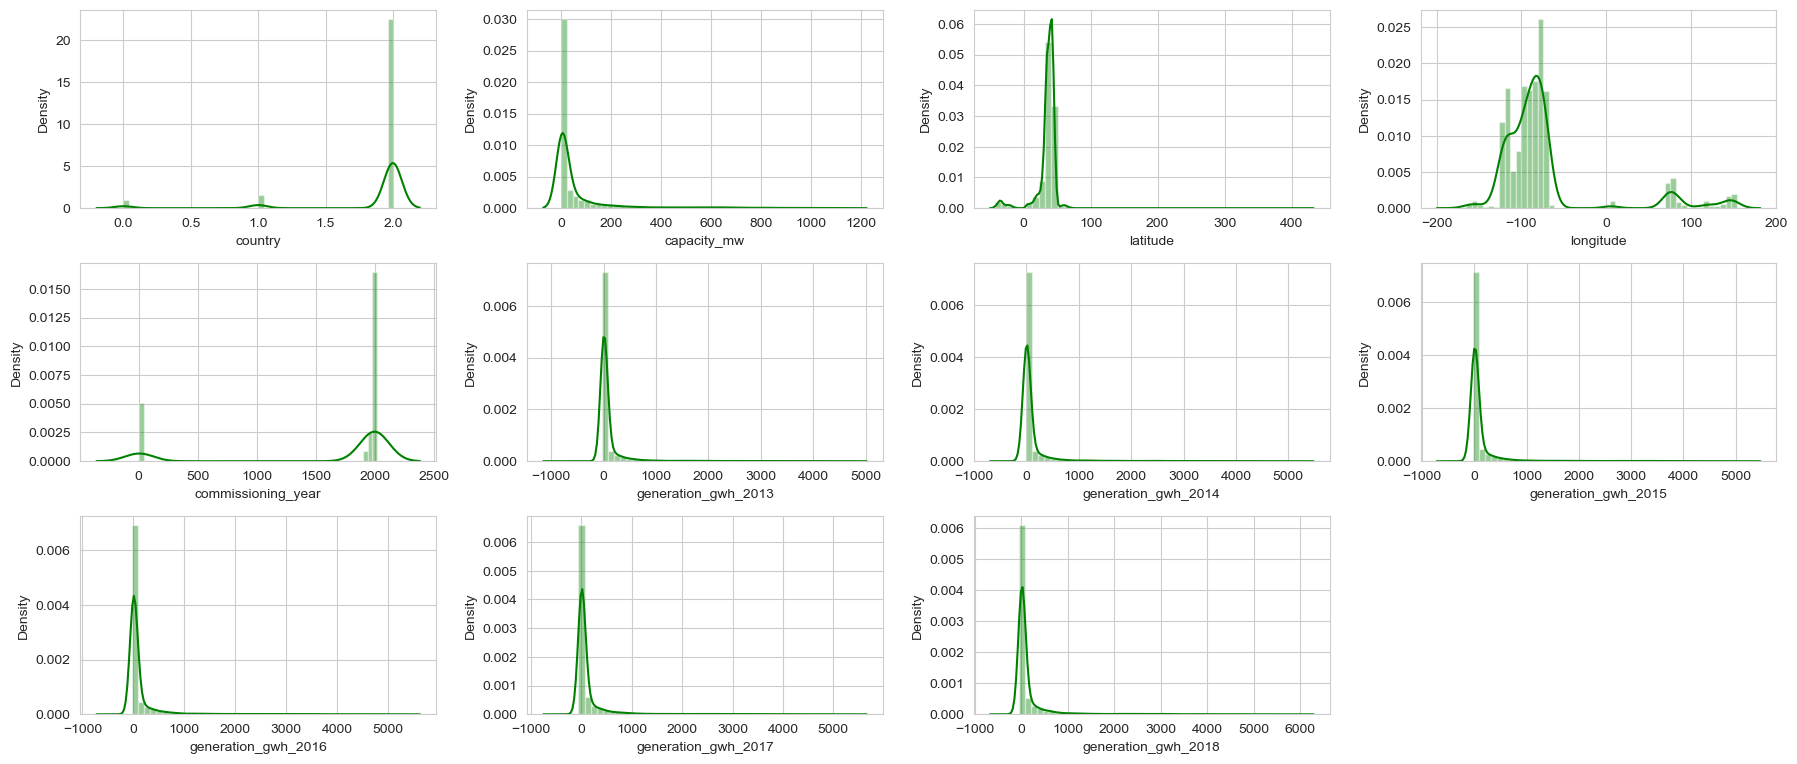

In [365]:
#Skewness Handling

numeric_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(8, 4, i+1)
    sns.distplot(df[col], color='g')

plt.tight_layout()
plt.show()

In [366]:
df.skew()

country                -3.279889
capacity_mw             3.671705
latitude               -1.793951
longitude               2.374991
primary_fuel           -0.470197
commissioning_year     -1.467063
source                 -1.803314
geolocation_source     -3.375620
generation_gwh_2013     6.080026
generation_gwh_2014     5.701397
generation_gwh_2015     5.733371
generation_gwh_2016     5.855214
generation_gwh_2017     5.777285
generation_gwh_2018     5.708958
generation_gwh_2019    -0.438169
primary_fuel_encoded   -0.470197
dtype: float64

skewness more than+/- 0.5 will we treated
object columns will no be treated

In [367]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

country                -3.279889
capacity_mw             0.132154
latitude               -1.793951
longitude               2.374991
primary_fuel           -0.470197
commissioning_year     -1.467063
source                 -1.803314
geolocation_source     -3.375620
generation_gwh_2013    -9.115206
generation_gwh_2014    -6.030282
generation_gwh_2015    -6.589683
generation_gwh_2016    -5.911219
generation_gwh_2017    -6.950086
generation_gwh_2018     5.708958
generation_gwh_2019    -0.438169
primary_fuel_encoded   -0.470197
dtype: float64

First taking 'capacity_mw' as target creating Regression model



In [374]:
#Dividing Data into X and Y
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [375]:
x.shape

(12842, 15)

In [376]:
y.shape


(12842,)

In [377]:
#Scaling X values
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [378]:
pd.DataFrame(x).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000
mean,0.930735,0.166464,0.298594,0.614217,0.787545,0.460783,0.729793,0.876124,0.847211,0.865648,0.834078,0.859154,0.091793,0.526643,0.614217
std,0.221611,0.033242,0.189979,0.275186,0.398775,0.086822,0.164210,0.017543,0.022949,0.020920,0.024500,0.020638,0.079118,0.288247,0.275186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.164094,0.205264,0.384615,0.965252,0.468293,0.750000,0.871788,0.841091,0.859992,0.827357,0.853128,0.068892,0.272888,0.384615
50%,1.000000,0.173790,0.258965,0.769231,0.990568,0.468293,0.750000,0.871788,0.841091,0.859992,0.827357,0.853262,0.069132,0.634815,0.769231
75%,1.000000,0.181775,0.296124,0.769231,0.997022,0.468293,0.750000,0.873365,0.843946,0.862938,0.831139,0.857008,0.075197,0.733357,0.769231
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [379]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
0,12842.0,0.930735,0.221611,0.0,1.000000,1.000000,1.000000,1.0
1,12842.0,0.166464,0.033242,0.0,0.164094,0.173790,0.181775,1.0
2,12842.0,0.298594,0.189979,0.0,0.205264,0.258965,0.296124,1.0
3,12842.0,0.614217,0.275186,0.0,0.384615,0.769231,0.769231,1.0
4,12842.0,0.787545,0.398775,0.0,0.965252,0.990568,0.997022,1.0
5,12842.0,0.460783,0.086822,0.0,0.468293,0.468293,0.468293,1.0
6,12842.0,0.729793,0.164210,0.0,0.750000,0.750000,0.750000,1.0
7,12842.0,0.876124,0.017543,0.0,0.871788,0.871788,0.873365,1.0
8,12842.0,0.847211,0.022949,0.0,0.841091,0.841091,0.843946,1.0
9,12842.0,0.865648,0.020920,0.0,0.859992,0.859992,0.862938,1.0


In [380]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [381]:
x_train.shape

(10273, 15)

In [382]:
x_test.shape

(2569, 15)

In [383]:
y_train.shape

(10273,)

In [384]:
y_test.shape

(2569,)

In [385]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5430712856304801


In [388]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.5147331486515695
MAE: 0.557806797622176
r2_score: 0.05675568201068304


In [391]:
#Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5390569276287892


In [396]:
#DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9998093296632278


In [397]:
# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL Dividing data into X and Y

In [398]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [399]:
x.shape


(12842, 15)

In [400]:
y.shape


(12842,)

In [401]:
#Spliting Train and Test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)


In [402]:
x_train.shape


(9374, 15)

In [403]:
x_test.shape


(3468, 15)

In [404]:
y_train.shape


(9374,)

In [405]:
y_test.shape


(3468,)

In [408]:
#LogisticRegression
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.48014379451136174


In [409]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.4809688581314879
[[   0    0    0    9    0    6    0    2    0    0   35    0    0    4]
 [   0    3    0   43    0    7    0    2    0    0   37    0    0    3]
 [   0    0    0    3    0    0    0    0    0    0    6    0    0    0]
 [   0    4    0  143    0   51    0   22    0    0  299    0    0    1]
 [   0    0    0    8    0    0    0    0    0    0    7    0    0    0]
 [   0    4    0  124    0   79    0    4    0    0  307    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    5    0   14    0   99    0    0  132    0    0    1]
 [   0    0    0    2    0    0    0    0    0    0    3    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    3    0    0    0]
 [   0    0    0   32    0   13    0   67    0    0 1343    0    0    7]
 [   0    0    0    0    0    0    0   13    0    0   16    0    0    0]
 [   0    0    0   25    0   18    0    3    0    0  110    0    0    0]
 [   0    2    0  154    0   15 

In [410]:
#DECISION TREE CLASSIFIER
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 1.0


In [411]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

1.0
[[  56    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   95    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    9    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  520    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   15    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  518    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    2    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  251    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    5    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    3    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1462    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0   29    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  156    0]
 [   0    0    0    0    0    0    0    0    0 

In [412]:
#KNeighborsClassifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6189004655313958


In [413]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.668396770472895
[[  14    4    0   12    1    3    0    1    0    0   14    0    2    5]
 [   7   34    0   23    0   16    0    3    0    0    3    0    1    8]
 [   1    0    0    1    0    0    0    0    0    0    4    0    0    3]
 [   9   20    1  230    0   48    0   48    0    0   96    0   22   46]
 [   1    0    0    3    0    2    0    0    0    0    1    0    0    8]
 [  11   14    1  126    0  288    0    4    0    0   36    1   10   27]
 [   0    1    0    0    0    0    0    0    0    0    1    0    0    0]
 [   1    4    0   31    0   18    0  169    0    0   19    4    2    3]
 [   0    0    0    2    0    1    0    0    0    0    1    0    0    1]
 [   0    0    0    0    0    0    0    1    0    0    1    0    1    0]
 [   3    0    0   40    1    3    0   10    0    0 1359    0   20   26]
 [   0    0    0    1    0    0    0    4    0    0    1   23    0    0]
 [   3    1    0   31    0   17    0    3    0    0   46    0   34   21]
 [   1    2    1   43    1   11  